In [1]:
import numpy as np
from skimage import io
import os
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
from natsort import natsorted
import random

In [2]:
data_dir = '/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning'
label_dir = data_dir + '/Labels'
label_rgb_dir = data_dir + '/Labels_RGB'
slim_dir = data_dir + '/SLIM_images'
bf_dir = data_dir + '/WBC_brightfield'
YOLO_file = data_dir + '/YOLOfiles.mat'
# yolo = loadmat(YOLO_file)
# print(yolo.keys())

In [3]:
label_fns = natsorted(os.listdir(label_dir))
label_rgb_fns = natsorted(os.listdir(label_rgb_dir))
slim_fns = natsorted(os.listdir(slim_dir))
bf_fns = natsorted(os.listdir(bf_dir))
# yolo_fns = os.listdir(YOLO_file)
print('Labels: {}'.format(len(label_fns)))
print('Labels_RGB: {}'.format(len(label_rgb_fns)))
print('SLIM_images: {}'.format(len(label_fns)))
print('WBC_brightfield: {}'.format(len(bf_fns)))
print(label_fns[:5])
print(label_rgb_fns[:5])
print(slim_fns[:5])
print(bf_fns[:5])

Labels: 504
Labels_RGB: 504
SLIM_images: 504
WBC_brightfield: 504
['Label0000.tif', 'Label0001.tif', 'Label0002.tif', 'Label0003.tif', 'Label0004.tif']
['PixelLabelData_230000.png', 'PixelLabelData_230001.png', 'PixelLabelData_230002.png', 'PixelLabelData_230003.png', 'PixelLabelData_230004.png']
['M (1).png', 'M (2).png', 'M (3).png', 'M (4).png', 'M (5).png']
['M0000.png', 'M0001.png', 'M0002.png', 'M0003.png', 'M0004.png']


(1024, 1024) 254 5
(1024, 1024, 3) 255 68
(1024, 1024) 1.0 0.0
(1024, 1024, 3) 1.0 0
1
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//SLIM_images/M (137).png
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//WBC_brightfield/M0136.png
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//Labels/Label0136.tif
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//Labels_RGB/PixelLabelData_230136.png
(1024, 1024) 251 7
(1024, 1024, 3) 255 101
(1024, 1024) 1.0 0.0
(1024, 1024, 3) 1.0 0
1
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//SLIM_images/M (228).png
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//WBC_brightfield/M0227.png
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//Labels/Label0227.tif
/shared/anastasio-s1/CommonData/phase_fl_cells/WBC_MachineLearning//Labels_RGB/PixelLabelData_230227.png
(1024, 1024) 248 12
(1024, 1024, 3) 255 84
(1024, 1024) 4.0 0.0
(

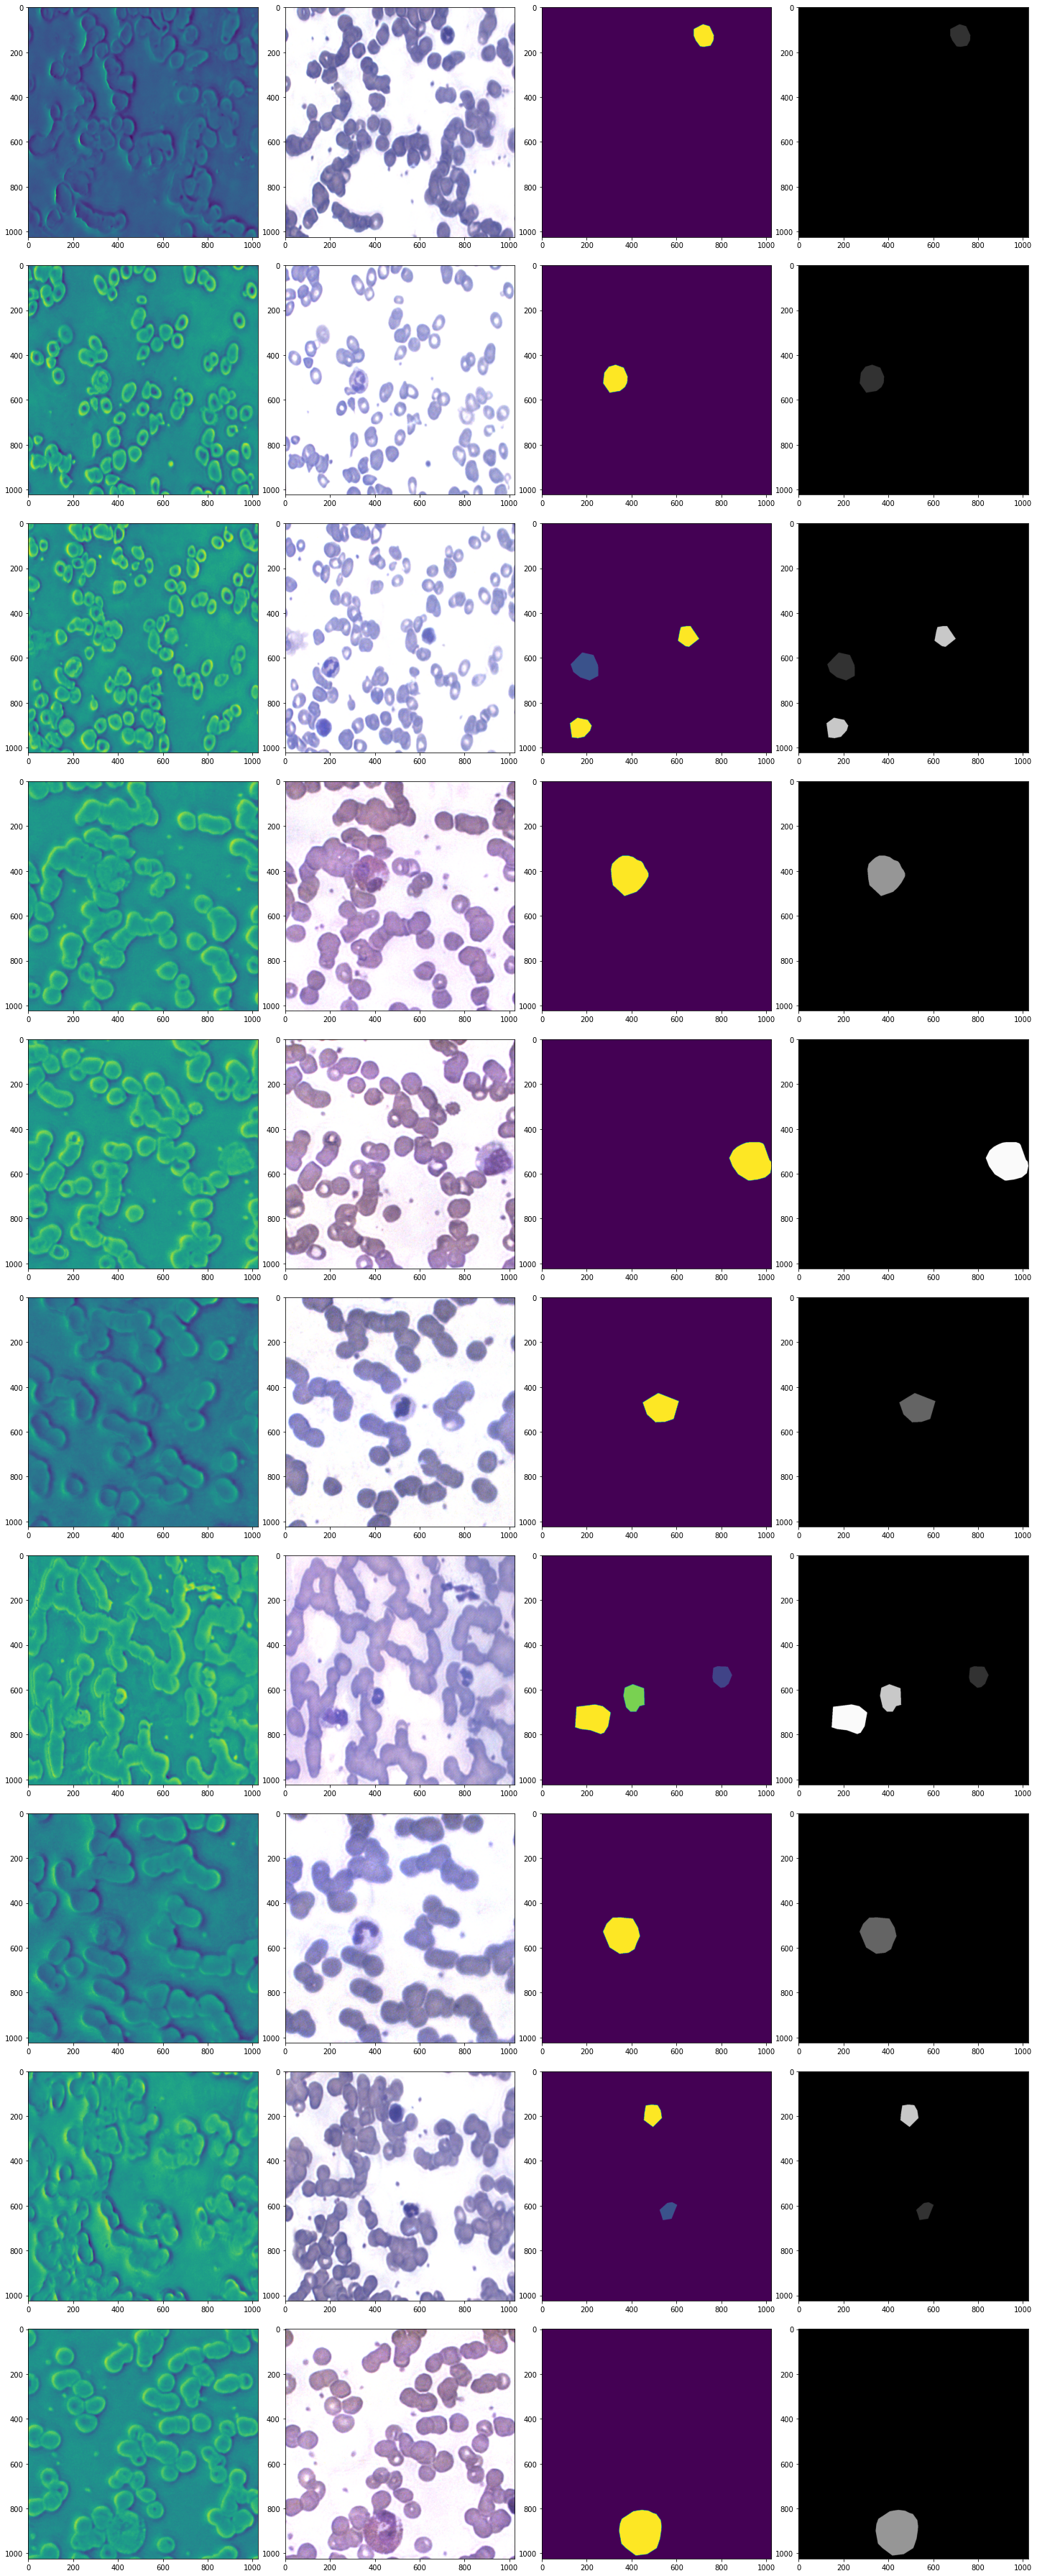

In [39]:
# fig = plt.figure(tight_layout = True)
num = 10
indicies = random.sample(range(len(slim_fns)), num)
rows, cols, size = num, 4, 5
fig = plt.figure(tight_layout=True,figsize=(size*cols, size*rows))
ax = fig.subplots(rows,cols)
for i in range(num):
    img_index = indicies[i]
    slim_file = slim_dir + '/{}'.format(slim_fns[img_index])
    bf_file = bf_dir + '/{}'.format(bf_fns[img_index])
    label_file = label_dir + '/{}'.format(label_fns[img_index])
    label_rgb_file = label_rgb_dir + '/{}'.format(label_rgb_fns[img_index])
    slim = io.imread(slim_file); print(slim.shape, slim.max(), slim.min())
    bf = io.imread(bf_file); print(bf.shape, bf.max(), bf.min())
    label = io.imread(label_file); print(label.shape, label.max(), label.min())
    label_rgb = io.imread(label_rgb_file); print(label_rgb.shape, label.max(), label_rgb.min())
    ax[i,0].imshow(slim)
    ax[i,1].imshow(bf)
    ax[i,2].imshow(label)
    ax[i,3].imshow(label_rgb*50)
    print(img_id)
    print(slim_file)
    print(bf_file)
    print(label_file)
    print(label_rgb_file)

In [ ]:
''' prepare datasets for SLIM
'''
import shutil
def generate_folder(folder):
    if not os.path.exists(folder):
        os.system('mkdir -p {}'.format(folder))

output_dir = '../../../datasets/'
dataset = 'wbc_1024x1024'
dataset_folder = output_dir+dataset
generate_folder(dataset_folder)
image_folder = dataset_folder + '/images'
map_folder = dataset_folder + '/seg_maps'
generate_folder(image_folder)
generate_folder(map_folder)

# for i in range(2):
for i in range(len(slim_fns)):
    shutil.copyfile(slim_dir + '/' + slim_fns[i], image_folder + '/' + '{:04d}.png'.format(i))
    os.system('cp -f {} {}'.format(label_dir + '/' + label_fns[i], map_folder + '/' + '{:04d}.tif'.format(i)))
    if i % 100 == 0:
        print('{} images copied!'.format(i))

0 images copied!
100 images copied!
200 images copied!
300 images copied!
400 images copied!


In [ ]:
''' prepare datasets Bright field
'''
import shutil
def generate_folder(folder):
    if not os.path.exists(folder):
        os.system('mkdir -p {}'.format(folder))

output_dir = '../../../datasets/'
dataset = 'wbc2_1024x1024'
dataset_folder = output_dir+dataset
generate_folder(dataset_folder)
image_folder = dataset_folder + '/images'
map_folder = dataset_folder + '/seg_maps'
generate_folder(image_folder)
generate_folder(map_folder)

# for i in range(2):
for i in range(len(bf_fns)):
    shutil.copyfile(bf_dir + '/' + bf_fns[i], image_folder + '/' + '{:04d}.png'.format(i))
    os.system('cp -f {} {}'.format(label_dir + '/' + label_fns[i], map_folder + '/' + '{:04d}.tif'.format(i)))
    if i % 100 == 0:
        print('{} images copied!'.format(i))

In [75]:
''' Split the test/val/test
'''
random.seed(0) # set the random seed
fns = os.listdir(image_folder); print('total: {}'.format(len(fns)))
test_set = random.sample(fns, 100); print('test: {}'.format(len(test_set)))
rest_set = [fn for fn in fns if fn not in test_set]; print('after test: {}'.format(len(rest_set)))
val_set = random.sample(rest_set, 100); print('valid: {}'.format(len(val_set)))
train_set = [fn for fn in fns if fn not in test_set and fn not in val_set]; print('train: {}'.format(len(train_set)))

# save test file
test_file = dataset_folder + '/test_list.txt'
with open(test_file, 'w+') as f:
    for fn in test_set:
        f.write('{}\n'.format(fn.split('.')[0]))
print(test_file + ' saved!')

# save valid file
valid_file = dataset_folder + '/valid_list.txt'
with open(valid_file, 'w+') as f:
    for fn in val_set:
        f.write('{}\n'.format(fn.split('.')[0]))
print(valid_file + ' saved!')

# save train file
train_file = dataset_folder + '/train_list.txt'
with open(train_file, 'w+') as f:
    for fn in train_set:
        f.write('{}\n'.format(fn.split('.')[0]))
print(train_file + ' saved!')

total: 504
test: 100
after test: 404
valid: 100
train: 304
../../../datasets/wbc_1024x1024/test_list.txt saved!
../../../datasets/wbc_1024x1024/valid_list.txt saved!
../../../datasets/wbc_1024x1024/train_list.txt saved!
